In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [3]:
onion= pd.read_csv('C:/Users/HP/Documents/MonthWiseMarketArrivals_Clean.csv')
onion.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
onion.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [5]:
onion.set_index('date',inplace=True)

In [6]:
onion.index

Index(['January-2005', 'January-2006', 'January-2010', 'January-2011',
       'January-2012', 'January-2013', 'January-2014', 'January-2015',
       'February-2005', 'February-2006',
       ...
       'December-2006', 'December-2007', 'December-2008', 'December-2009',
       'December-2010', 'December-2011', 'December-2012', 'December-2013',
       'December-2014', 'December-2015'],
      dtype='object', name='date', length=10227)

In [7]:
onion.sort_index(inplace=True)

In [8]:
y=onion.priceMod
x=onion[['market','month','year','quantity','priceMin','priceMax','state']]

In [9]:
dummy=pd.get_dummies(onion)
dummy.columns

Index(['year', 'quantity', 'priceMin', 'priceMax', 'priceMod',
       'market_ABOHAR(PB)', 'market_AGRA(UP)', 'market_AHMEDABAD(GUJ)',
       'market_AHMEDNAGAR(MS)', 'market_AJMER(RAJ)',
       ...
       'city_SRIGANGANAGAR', 'city_SRINAGAR', 'city_SRIRAMPUR', 'city_SURAT',
       'city_TRIVENDRUM', 'city_UDAIPUR', 'city_UJJAIN', 'city_VANI',
       'city_VARANASI', 'city_YEOLA'],
      dtype='object', length=275)

In [10]:
scaler=MinMaxScaler()
scaler_data=scaler.fit(dummy)
scaler_data=scaler.transform(dummy)

In [11]:
train_x,train_y,test_x,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
Need=pd.DataFrame(onion[onion.city=="MUMBAI"]["priceMod"])
Need

,priceMod
date,
April-2004,397
April-2005,328
April-2006,290
April-2007,531
April-2008,418
...,...
September-2011,1286
September-2012,707
September-2013,4550


In [13]:
onions= onion.loc[onion.city == "MUMBAI"].copy()
onions

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
April-2004,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
April-2005,MUMBAI,April,2005,286150,238,419,328,MS,MUMBAI
April-2006,MUMBAI,April,2006,253765,240,343,290,MS,MUMBAI
April-2007,MUMBAI,April,2007,235600,434,628,531,MS,MUMBAI
April-2008,MUMBAI,April,2008,218050,356,482,418,MS,MUMBAI
...,...,...,...,...,...,...,...,...,...
September-2011,MUMBAI,September,2011,231170,1076,1492,1286,MS,MUMBAI
September-2012,MUMBAI,September,2012,209150,550,890,707,MS,MUMBAI
September-2013,MUMBAI,September,2013,131590,3960,5135,4550,MS,MUMBAI


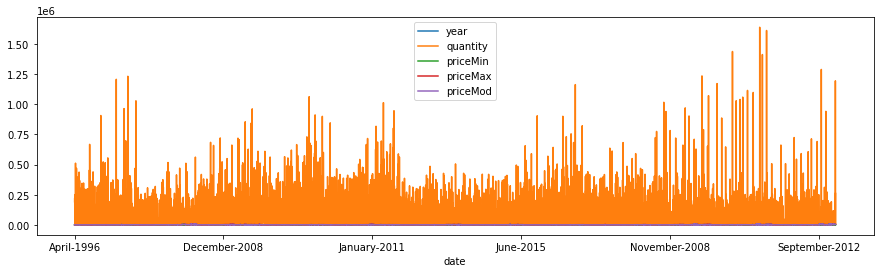

In [14]:
onion.plot(figsize=(15,4))
plt.show()

In [15]:
Onion1 = onion.drop(["market","month","year","quantity","priceMin","priceMax","state"], axis=1)
Onion1

,priceMod,city
date,,
April-1996,254,LASALGAON
April-1997,214,LASALGAON
April-1998,235,PIMPALGAON
April-1998,253,CHAKAN
April-1998,237,NIPHAD
...,...,...
September-2015,4190,VANI
September-2015,4000,LONAND
September-2015,3140,BANGALORE


In [16]:
Onion1["log_priceMod"] = np.log(Onion1.priceMod)

In [17]:
Onion_mean = Onion1.log_priceMod.mean()
Onion1["mean_price"] = np.exp(Onion_mean)
Onion1.head()

,priceMod,city,log_priceMod,mean_price
date,,,,
April-1996,254,LASALGAON,5.537334,750.244126
April-1997,214,LASALGAON,5.365976,750.244126
April-1998,235,PIMPALGAON,5.459586,750.244126
April-1998,253,CHAKAN,5.533389,750.244126
April-1998,237,NIPHAD,5.468060,750.244126


<AxesSubplot:xlabel='date'>

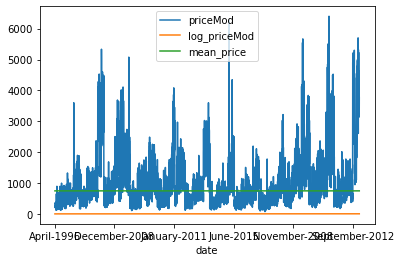

In [18]:
Onion1.plot(kind="line")

In [19]:
x="date"
y=["priceMod", "mean_price"]

In [20]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [21]:
mean_modelRMSE = RMSE(Onion1.priceMod, Onion1.mean_price)
mean_modelRMSE

851.2372847151743

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

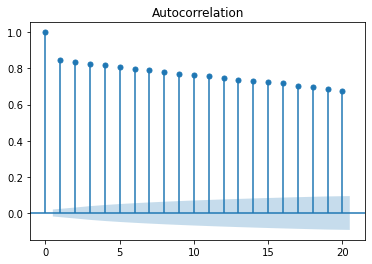

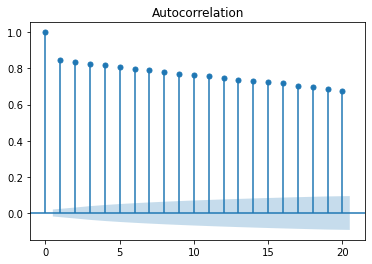

In [23]:
plot_acf(onion['priceMod'].tolist(), lags=20)